## Exploratory Data Analytics

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("C:/Users/HP/Downloads/churn project/Customer Churn Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgChargesPerMonth
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.57
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.08
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.91
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.83


In [46]:
print("Dimensions: ", df.shape)

print("\n Column Name: ", df.columns)

print("\n Info: ")
df.info()

Dimensions:  (7043, 22)

 Column Name:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgChargesPerMonth'],
      dtype='object')

 Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   gender              7043 non-null   object 
 2   SeniorCitizen       7043 non-null   object 
 3   Partner             7043 non-null   object 
 4   Dependents          7043 non-null   object 
 5   tenure              7043 non-null   int64  
 6   PhoneService        7043 non-null   o

In [47]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,AvgChargesPerMonth
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,64.698442
std,24.559481,30.090047,2266.794470,30.270666
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,35.650000
50%,29.000000,70.350000,1394.550000,70.300000
75%,55.000000,89.850000,3786.600000,90.170000
max,72.000000,118.750000,8684.800000,121.400000


In [48]:
print("Null Values in Data: ", df.isnull().sum())

Null Values in Data:  customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
AvgChargesPerMonth    0
dtype: int64


In [49]:
print("duplicate values in data:",df.duplicated().sum())

duplicate values in data: 0


In [50]:
churn_rate = df.groupby('Churn').size() / len(df) * 100
print("\nChurn rate:\n", churn_rate)



Churn rate:
 Churn
No     73.463013
Yes    26.536987
dtype: float64


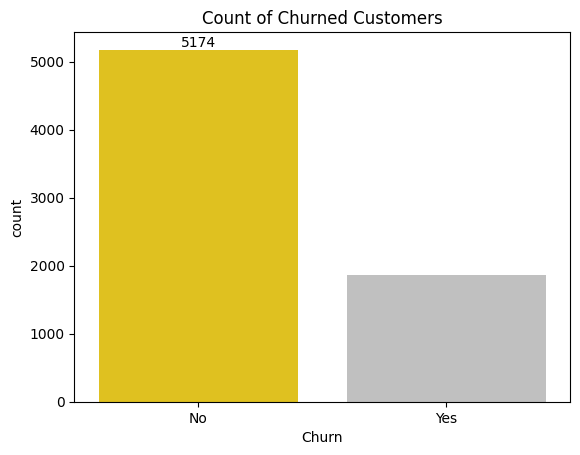

In [51]:
# I want to see How Many People Churning Out From Network

ax = sns.countplot(x='Churn', data=df, palette = ['gold', 'silver'])
ax.bar_label(ax.containers[0])
plt.title('Count of Churned Customers')
plt.show()

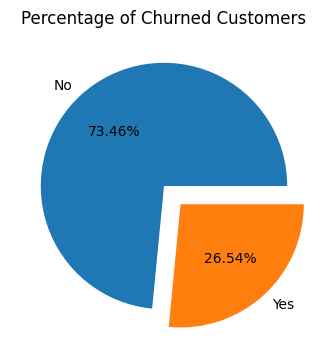

In [52]:
# Want see Percentages of Churn
explode = [0, 0.2]

# colors = ['green', 'red']

plt.figure(figsize = (6,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, explode = explode, autopct ='%1.2f%%'),
plt.title('Percentage of Churned Customers')
plt.show()

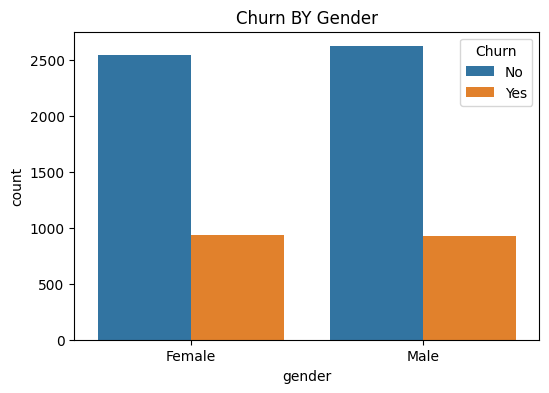

In [53]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title('Churn BY Gender')
plt.show()

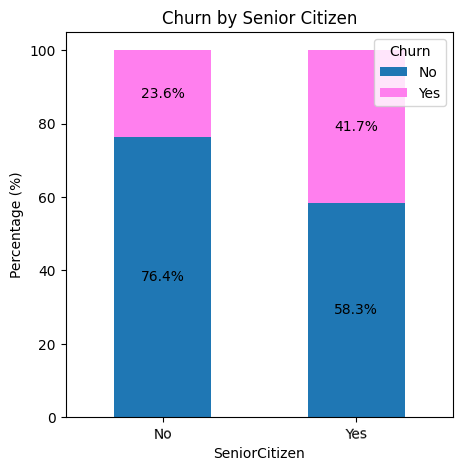

In [54]:
total_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value= 0)
                                                                     
total_counts = total_counts.div(total_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(5,5))
total_counts.plot(kind='bar', stacked=True, ax=ax, color=["#1f77b4", "#ff7fee"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0: # Avoid showing labels for empty sections
          ax.text(
              x + width / 2,
              y + height / 2,
              f"{height:.1f}%",
              ha="center", va="center"
 )

plt.title("Churn by Senior Citizen")
plt.xlabel('SeniorCitizen')
plt.ylabel("Percentage (%)")
plt.xticks(rotation=2)
plt.legend(title="Churn", loc='upper right')
plt.show()

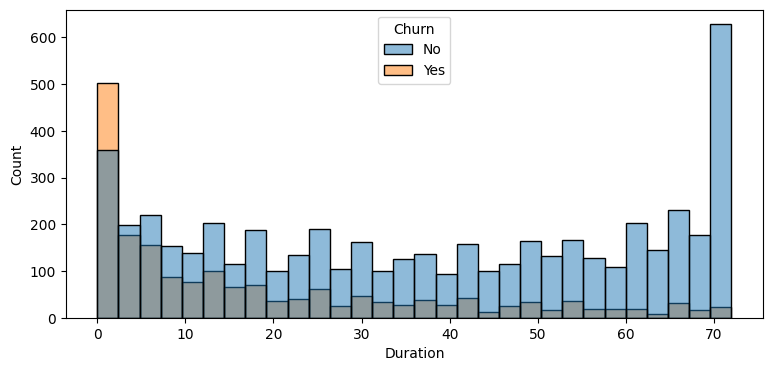

In [55]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 30, hue = 'Churn')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()


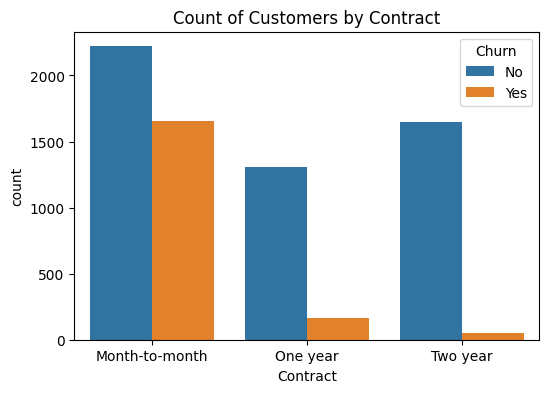

In [56]:
plt.figure(figsize = (6,4))
sns.countplot(x = df['Contract'], data = df, hue = 'Churn')
plt.title('Count of Customers by Contract')
plt.show()

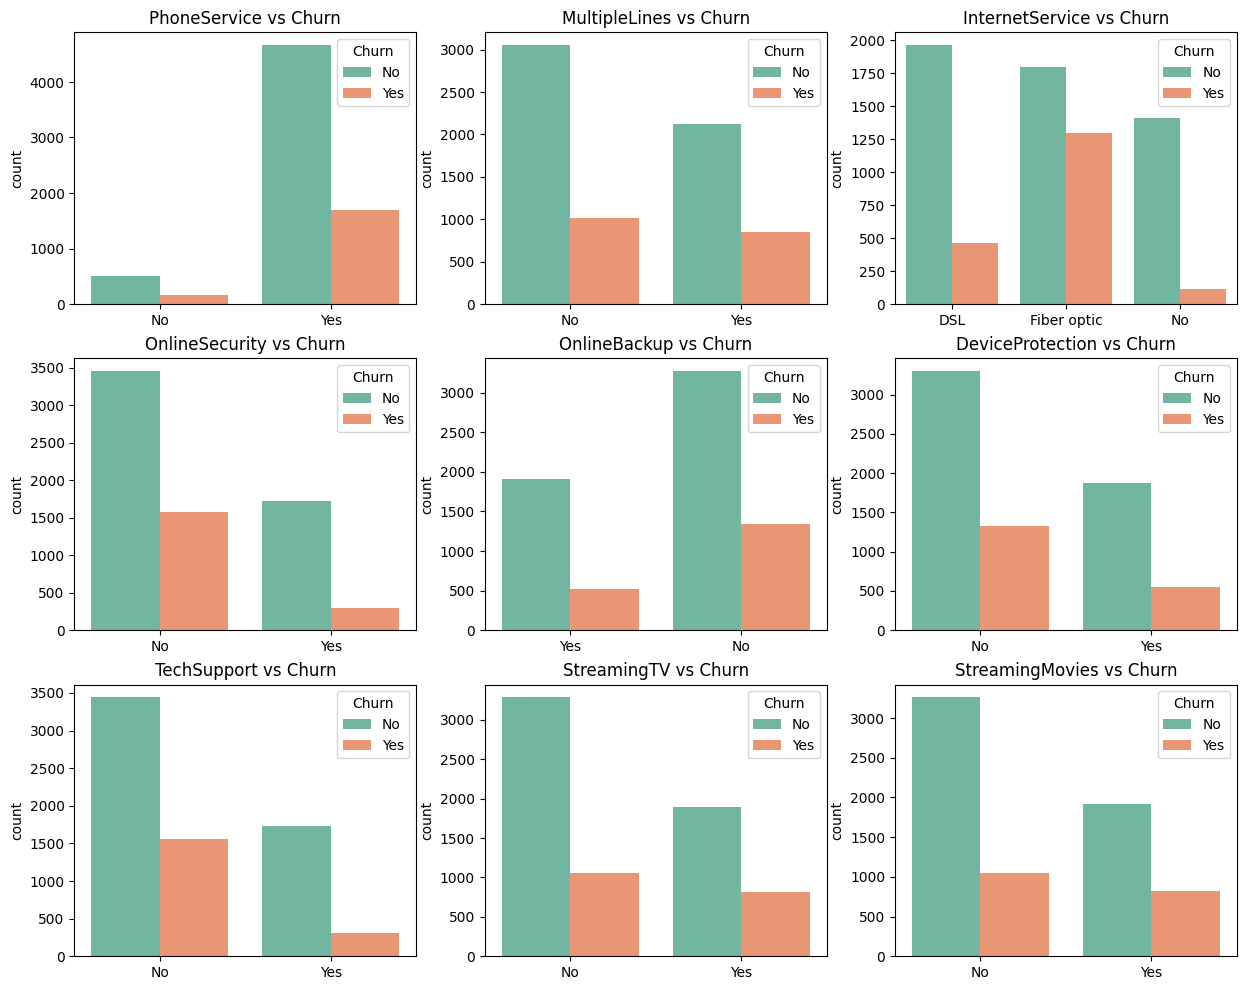

In [57]:
# Columns to plot
cols = [
 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
# Create subplots grid (3 rows × 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
# Loop through columns and plot
for i, col in enumerate(cols):
 sns.countplot(x=col,hue = "Churn",data=df, ax=axes[i], palette="Set2")
 axes[i].set_title(f"{col} vs Churn")
 axes[i].set_xlabel("")

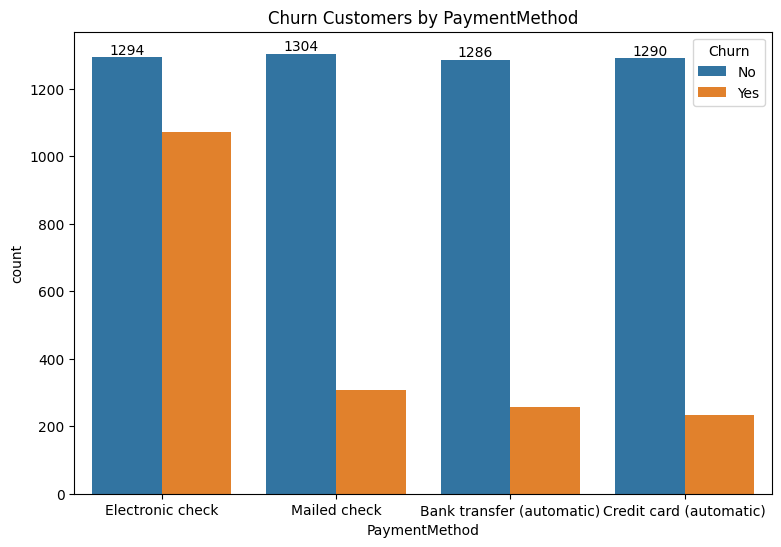

In [58]:
plt.figure(figsize=(9,6))
x=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
x.bar_label(x.containers[0])
plt.title("Churn Customers by PaymentMethod")
plt.show()

In [59]:
print("\nEDA Completed Successfully ✅")


EDA Completed Successfully ✅
